# Import the libraries

In [1]:
import os
os.chdir('W:\Drowsiness Detection')

%pwd

'W:\\Drowsiness Detection'

In [20]:
import torch

import matplotlib.pyplot as plt
import cv2

import numpy as np

import uuid
import time

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


# Experiment

In [34]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
print(type(model))

Using cache found in C:\Users\__Ayad__/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-16 Python-3.9.13 torch-1.10.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


<class 'models.common.AutoShape'>


### Image

In [35]:
img_url = 'https://media.istockphoto.com/id/159406920/photo/aerial-view-of-cars-in-traffic.jpg?s=612x612&w=0&k=20&c=2BeXnk1EppE_mfWgYFqoXidmge0uAhSk9gl8bbtHyF8='

In [36]:
results = model(img_url)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 408x612 27 cars, 1 traffic light
Speed: 555.5ms pre-process, 351.4ms inference, 24.8ms NMS per image at shape (1, 3, 448, 640)

In [37]:
# This method returns the image array in a list

img_array = results.render()[0]
img_array.shape

(408, 612, 3)

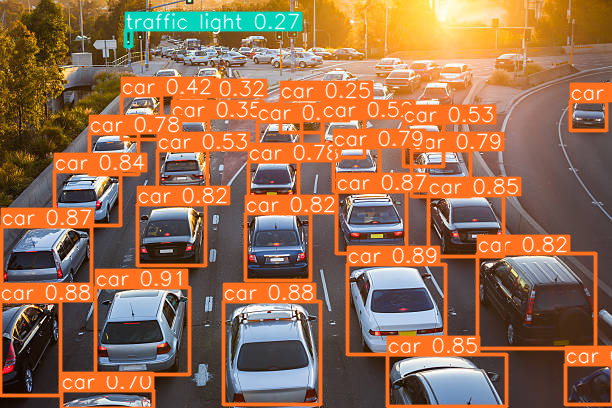

In [38]:
# plt.imshow(img_array)
# plt.show()

results.show()

In [12]:
# To show coordinates of all objects, use the following method
results.xyxy

[tensor([[9.50514e+01, 2.87355e+02, 1.89469e+02, 3.74683e+02, 9.05224e-01, 2.00000e+00],
         [3.47130e+02, 2.64398e+02, 4.45096e+02, 3.54299e+02, 8.87480e-01, 2.00000e+00],
         [0.00000e+00, 3.01617e+02, 6.04830e+01, 3.95299e+02, 8.84884e-01, 2.00000e+00],
         [2.23315e+02, 3.01757e+02, 3.20673e+02, 4.04250e+02, 8.79179e-01, 2.00000e+00],
         [1.36698e+00, 2.26688e+02, 9.14122e+01, 2.97425e+02, 8.71943e-01, 2.00000e+00],
         [3.36436e+02, 1.91776e+02, 4.06031e+02, 2.53546e+02, 8.69171e-01, 2.00000e+00],
         [3.87778e+02, 3.54383e+02, 5.06660e+02, 4.06710e+02, 8.52108e-01, 2.00000e+00],
         [4.28131e+02, 1.95376e+02, 5.03260e+02, 2.56717e+02, 8.45499e-01, 2.00000e+00],
         [5.40741e+01, 1.71977e+02, 1.20754e+02, 2.25221e+02, 8.42516e-01, 2.00000e+00],
         [1.37228e+02, 2.04989e+02, 2.05957e+02, 2.65951e+02, 8.24318e-01, 2.00000e+00],
         [2.45227e+02, 2.13030e+02, 3.10419e+02, 2.80770e+02, 8.24141e-01, 2.00000e+00],
         [4.77037e+02

### Real Time Video

In [8]:
cap = cv2.VideoCapture(0)
cap.isOpened()

True

In [9]:
while cap.isOpened():
    done, frame = cap.read()
    
    if done==True:
        
        results = model(frame)
        frame = np.squeeze(results.render())
        
        cv2.imshow("Ayad", cv2.flip(frame, 1))
        
        if cv2.waitKey(1)==ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

# Train a custom model

### Collect the data

In [23]:
if not os.path.exists('data'):
    os.mkdir('data')
    os.mkdir('data/images')
    os.mkdir('data/labels')

In [27]:
labels = ['awake', 'drowsy']
noOfImages = 15 # for every class
images_path = 'data/images/'

In [28]:
cap = cv2.VideoCapture(0)
cap.isOpened()

True

In [33]:
for l in labels:
    print(f"\n\nAfter 10 seconds, you'll collect images for --{l}-- label.\nBe ready...\n\n")
    time.sleep(10)
    
    for img in range(1, noOfImages+1):
        print('Collecting image for --{}-- label.\t\timage no: {}'.format(l, img))
        
        ret, frame = cap.read()
        
        path_name_img = images_path + l + str(img) + '.jpg'
        
        cv2.imwrite(path_name_img, frame)
        cv2.imshow('Ayad_img', frame)
        
        time.sleep(2)
        
        if cv2.waitKey(1) == ord('q'):
            break
            
cv2.destroyAllWindows()

After 10 seconds, you'll collect images for --awake-- label.
Be ready...


After 10 seconds, you'll collect images for --drowsy-- label.
Be ready...




**You should annotate the images using any program or any website.<br>I used [Roboflow website](https://roboflow.com/annotate).**

### Train the model

**Before the training, download the weight file from [here](https://github.com/ultralytics/yolov5/releases/download/v5.0/yolov5s.pt)**

In [42]:
os.chdir('yolov5')
os.getcwd()

'W:\\Drowsiness Detection\\yolov5'

In [45]:
!python train.py --img 244 --batch 10 --epochs 22 --data data.yaml --weights yolov5s.pt --workers 2

### Evaluation

In [ ]:
model_path = r'W:\Drowsiness Detection\yolov5\runs\train\exp2\weights\best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)
print(type(model))

In [ ]:
img = # put here your image path
resul = model(img)


In [ ]:
resul.print()


In [ ]:
resul.show()